*Note:* In the lecture I'll be using  [Jupyter](https://jupyter.org/) and [RISE](https://rise.readthedocs.io/en/latest/usage.html#running-a-slideshow) to render the notebook as a slideshow. I do this for pedagogical purposes, on your own computer, you can ignore it and just read it as a notebook in VS Code.

# Model project

- The model project is a central part of the course. It's your chance to put together everything you have learned, and it connects the course with the rest of your economics education.
- They are also a good preparation for the exam.
- Two great projects is safety net. They can compensate for a disappointing exam project.

**Table of contents**<a id='toc0_'></a>    
- 1. [Finding a model project](#toc1_)    
- 2. [Doing the model project](#toc2_)    
  - 2.1. [Tips](#toc2_1_)    
  - 2.2. [Your visualisation of the model](#toc2_2_) 
  - 2.3. [Your extension of the model](#toc2_3_)    
- 3. [Turning the equations of a model into code](#toc3_)    
  - 3.1. [Example from 2019-exam, finding the equilibrium](#toc3_1_)   
  - 3.1. [Example from last re-exam 2024:](#toc3_1_)   

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Finding a model project](#toc0_)

This is also discussed in the project explanation: <br>
Find a model you like, preferably one you have encountered earlier in your studies.<br>

Some models (AS-AD, Ramsey, OLG, Exchange economy, dynamic consumption saving, worker/capitalists production model) have been covered in the lectures and in the problem sets. <br>

It's still perfectly fine to choose these models for your projects, but you need to change it and make it your own, as the part of the code that comes directly from the lectures with no adaption will not be counted in the assessment.

**What to consider when choosing a model**
- Do you understand the model reasonably well?
- Do you find it interesting?
- It's not super important that the model is complicated, but it puts the weight of the project on the extension part.

## 2. <a id='toc2_'></a>[Doing the model project](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Tips](#toc0_)

When working:
- Start with the most straightforeward solution. Then simplify and optimize the code. <br>
- Show and test intermediate results (both when you're working, but also in the project). <br>
- It's good to have an idea of what the results should look like, and make tests from that, to debug your code. <br>
- This can be from an analytical solution or intuition. <br>

Using modules (.py files) makes it **much easier** to structure your code. <br>
It also makes it easier to reuse functions, so you aviod repeating yourself. <br>

Don't relly too much on sympy. 'Numerical analysis' is part of the course name for a reason.

### 2.2. <a id='toc2_2_'></a>[Your visualisation of the model](#toc0_)

This is very model dependent, you can e.g.:
- Show the values that define the solution of your model, in whatever way you see fit
- Show how the solution changes for different parameter values
- If the model is time-dependent, then show evolution over time

### 2.3. <a id='toc2_3_'></a>[Your extension of the model](#toc0_)

- If you already have a complex model, your extension doesn’t necessarily have to be revolutionising. <br> 
With a good structure, it will typically not be that hard to re-solve the model with a different production or utility function. <br>

- On the other hand, if you have a simple model, the meat of your project is the extension.<br>
    This could include adding a new dimension to the model, like a new consumer good, making a parameter endogenous, etc.

## 3. <a id='toc3_'></a>[Turning the equations of a model into code](#toc0_)

The Ramsey and OLG lectures are also really good case studies of this.<br>
I have a quick aside on integrals and then I'll go through some examples.

**Turning an intergral into a sum**<br>
Integrals do not have a direct coding equivalent, but you can stil choose a model with integrals. <br>
- You can do an numerical approximate them using something like `scipy.integrate`
- You can also redefine the model into a discrete version, this is for example done in the Ramsey notebook <br>
E.g.
$L_t= L_0 e^{g\cdot t}$, means something grows about $g$ percent when $t$ increases by 1. <br>
\begin{align*}
\frac{\partial \left(L_0 e^{g\cdot t} \right) }{\partial t} \frac{1}{L_0 e^{g\cdot t}} = g
\end{align*}
So you write $L_t = (1+g)^t\cdot L_0$ or $L_t = (1+g)\cdot L_{t-1}$<br>
You can also take:
\begin{align*}
U = \int_{0}^{\infty} e^{(\beta-1) t} u(c(t)) dt  
\end{align*}
Write it as:
\begin{align*}
U = \sum_{t=0}^{\infty} \beta^t u(c(t))
\end{align*}
And change infinitely lived households to finite lived households.

Key points from the examples are:
- Walras law is almost always applicable when finding equilibrium prices with multiple traded goods. 
- Economic intuion can sometimes guide your solution algorithm (e.g. when demand exceeds supply, the price should be higher).
- Nested optimization is super useful, and much easier to do with good structure.
- It's easier to check your results when you understand the intuition of the model.

### 3.1. <a id='toc3_1_'></a>[Example from 2019-exam, finding the equilibrium](#toc0_)

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ 
    \begin{aligned}
    u^{j}(x_{1},x_{2},x_{3}) &=
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     \beta_{i}^{j} &= \frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     \boldsymbol{\alpha}^{j} &= (\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     \log(\boldsymbol{\alpha}^j) &\sim \mathcal{N}(\mu,\Sigma) \\
    \end{aligned} 
    $$

4. Endowments are exponentially distributed,

$$
\begin{aligned}
\boldsymbol{e}^{j} &= (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{aligned}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{aligned}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) &= \beta^{j}_i\frac{I^j}{p_{i}} \\
\end{aligned}
$$

where consumer $j$'s income is

$$
I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j
$$

In [1]:
%load_ext autoreload
%autoreload 2
from ExchangeEconomy_sol import ExchangeEconomyModel    

In [2]:
EE = ExchangeEconomyModel()
sim = EE.sim
par = EE.par

**Question 1:** Plot the histograms of the budget shares for each good across agents.

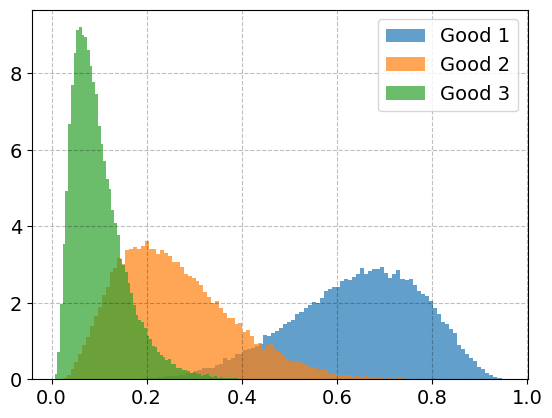

In [3]:
EE.plot_budget_shares()


Consider the **excess demand functions:**

$$ 
z_i(p_1,p_2) = \sum_{j=1}^N (x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j)
$$

**Question 2:** Plot the excess demand functions.

In [4]:
EE.excess_demand([1,1])

array([ 46378.54365009, -11081.58519671, -35296.95845338])

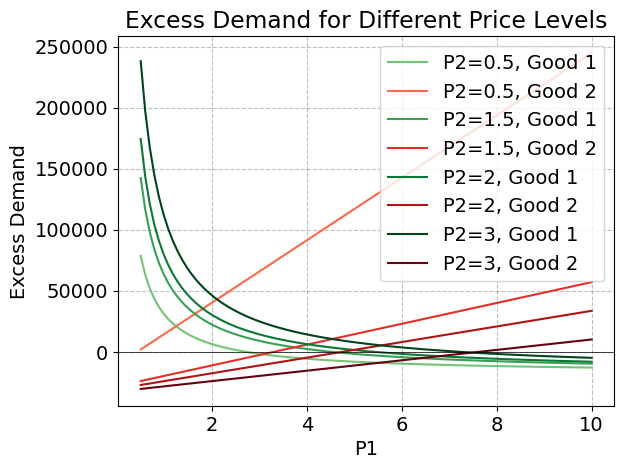

In [5]:
EE.plot_excess_demand()

In [6]:
EE.plot_excess_demand_interactive()

interactive(children=(FloatSlider(value=1.0, description='p2', max=3.0, min=0.5), Output()), _dom_classes=('wi…

**Question 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

In [7]:
EE.find_equilibrium_scipy()

Initial guess:
 P1 = 6.47, P2 = 2.61
Solution:
 P1 = 6.55, P2 = 2.63
Excess demand: [-5.40239853e-08  4.38958523e-08  2.40608642e-07]


 message: The solution converged.
 success: True
  status: 1
     fun: [-5.402e-08  4.390e-08]
       x: [ 6.554e+00  2.628e+00]
    nfev: 7
    fjac: [[-4.878e-01  8.729e-01]
           [-8.729e-01 -4.878e-01]]
       r: [ 5.604e+03 -1.474e+04  2.533e+03]
     qtf: [ 1.726e-05  5.585e-06]

In [8]:
par.kappa=4
EE.find_equilibrium()

Initial guess:
 P1 = 6.47, P2 = 2.61
Iteration 1: p = [6.465,2.61] -> Excess demand = [ 138.03547851 -134.18735787]
Iteration 2: p = [6.498,2.62] -> Excess demand = [ 102.00727412 -128.02023229]
Iteration 3: p = [6.519,2.62] -> Excess demand = [ 57.97644819 -64.41992267]
Iteration 4: p = [6.532,2.62] -> Excess demand = [ 38.32038114 -46.06664304]
Iteration 5: p = [6.540,2.62] -> Excess demand = [ 23.24977348 -26.83716703]
Iteration 6: p = [6.546,2.63] -> Excess demand = [ 14.82416884 -17.55127945]
Iteration 7: p = [6.549,2.63] -> Excess demand = [  9.19241871 -10.740022  ]
Iteration 8: p = [6.551,2.63] -> Excess demand = [ 5.79345732 -6.82504358]
Iteration 9: p = [6.552,2.63] -> Excess demand = [ 3.61844191 -4.24447799]
Iteration 10: p = [6.553,2.63] -> Excess demand = [ 2.27197993 -2.67228576]
Iteration 11: p = [6.553,2.63] -> Excess demand = [ 1.4223792  -1.67067971]
Iteration 12: p = [6.554,2.63] -> Excess demand = [ 0.89202259 -1.04867136]
Iteration 13: p = [6.554,2.63] -> Excess d

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

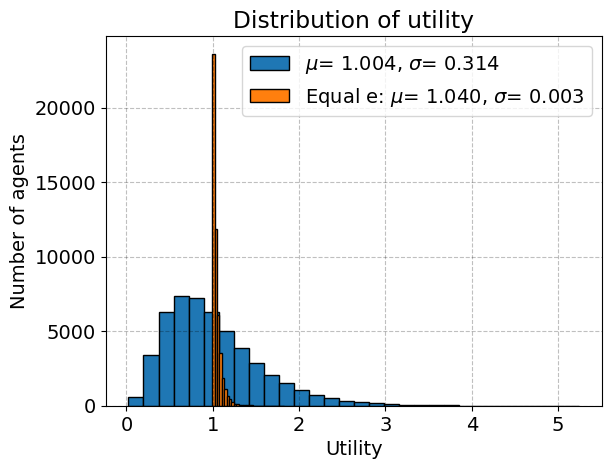

In [9]:
EE.plot_utility_distribution()

In [10]:
EE.plot_utility_distribution_interactive()

interactive(children=(FloatSlider(value=0.8, description='gamma', max=2.0, min=0.1), Output()), _dom_classes=(…

### 3.2. <a id='toc3_2_'></a>[Example from last re-exam 2024:](#toc0_)

Consider an exchange economy with two agents, $A$ and $B$ each with their own distinct good. Their endowment are $e_A$ and $e_B$. Agent $A$ is the price-taker (buyer), she takes the relative price of the two goods, $p$, as given and chooses the amount of agent $B$'s good to exchange for her own. Agent $B$ is the price-setter (seller), she sets the relative price between the goods, optimally taking into account $A$'s demand.

**Agent $A$, the buyer, solves:**
$$
\begin{align*}
V_{A}(p) = \max_{c,c'} u_A(c,c') \\ s.t. \; c+pc'=e_{A} \\
\end{align*}
$$
Or simply:
$$
\begin{align*}
V_{A}(p) = \max_{c'} u_A(e_{A}-pc',c')  \\
\end{align*}
$$
Where $c$ is consumption of her own good and $c'$ is consumption of the other good.<br>
$u_A$ is her utility function. <br>
This optimization yields the optimal demand function:
$$
\begin{align*}
\Rightarrow c' = D(p)
\end{align*}
$$

**Agent $B$, the seller, solves:**
\begin{align*}
p^* \equiv \arg\max_p v_B(p) \\
\end{align*}
where
\begin{align*}
\;\,v_B(p) \equiv u_B(e_B-D(p),pD(p))
\end{align*}

$u_B$ is her utility function in consumption of her own good (intital endowment, $e_B$, minus what is sold, $D(p)$), and consumption of the other good ($pD(p)$) obtained through trade. $v_B(p)$ is her indirect utility, when the price is $p$, taking into account the optimal demand of the buyer.

Assume that agents are symmetric with quasi-linear utility functions:
\begin{align*}
u_A=u_B=u(c,c') = c+ \frac{(c')^{1-\frac{1}{\epsilon}} }{1-\frac{1}{\epsilon}}
\end{align*}
And also have equal endownment $e_A = e_B=10$.

Assume the following parameter value:
- $\epsilon = 10.$

**Question 1:** Nummerically solve, and illustrate optimal demand of the buyer, $A$, in the range $p\in [1,2]$. Verify that what you find numerically is equal to the analytical solution, $D(p)=p^{-\epsilon},\,p\geq1$ 

In [11]:
from Conflictmodel_sol import ConflictModel

In [12]:
CM = ConflictModel()
par = CM.par

In [13]:
CM.solve_A(1.5)

0.01734319673266483

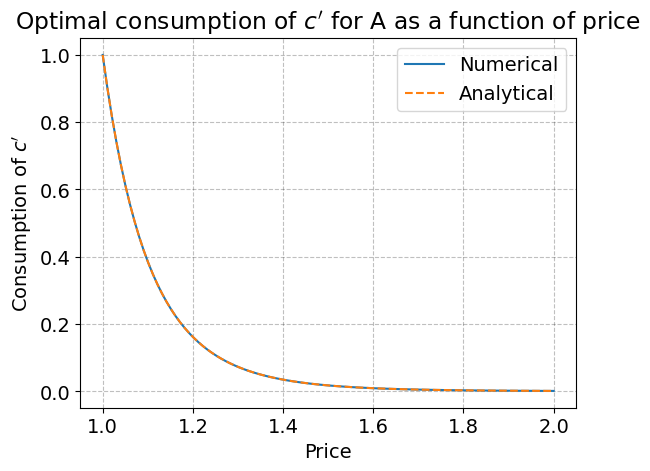

In [14]:
CM.plot_solve_A()

**Question 2:** Solve the seller's problem numerically, taking into account optimal demand of the buyer. Verify that what you find numerically is equal to the analytical solution: $p^* = \left(\frac{\epsilon}{\epsilon-1} \right)^\frac{\epsilon}{2\epsilon-1}$. <br>
*Hint:* For this problem you can use the analytical solution to $D(p)$, but it is recomended that you use the numerical solution to $D(p)$ from question 1, and nest that when solving the seller's problem, as you will need to do that in the next question.

In [15]:
# Code

In [16]:
print(CM.solve_B())
print(CM.solve_B_analytical())

1.057019036730325
1.057019233441802


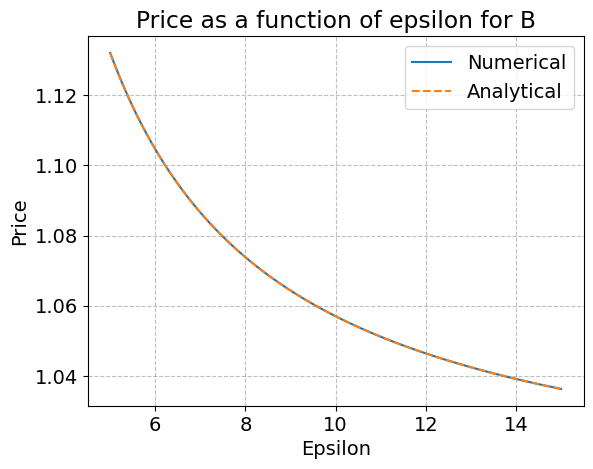

In [17]:
CM.plot_solve_B()

Now consider a fully non-linear utility function, for both agents:
\begin{align}
u_A = u_B = u(c,c') = \frac{(c)^{1-\frac{1}{\eta}} }{1-\frac{1}{\eta}}+ \frac{(c')^{1-\frac{1}{\epsilon}} }{1-\frac{1}{\epsilon}}
\end{align}

**Question 3:** Solve for $p^*$ for the fully non-linear utility function, for $\eta \in \left\{1000,10\right\}$ <br>
*Hint:* Note that this requires both solving the buyer's problem and the seller's problem numerically. 

In [18]:
# Code

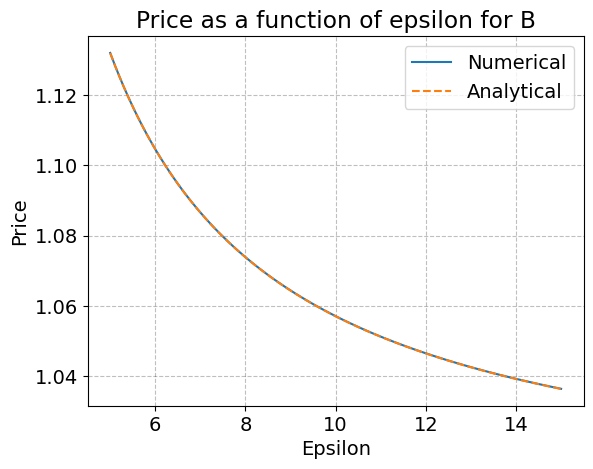

In [19]:
CM.u = CM.u_nonlinear
par.eta = 1000
CM.plot_solve_B()

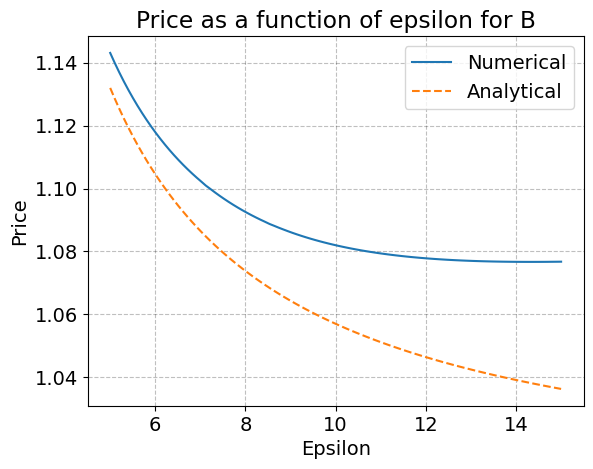

In [20]:
par.eta = 10
CM.plot_solve_B() # The numerical doesn't work anymore because it is for the quasilinear utility function

**Question 4:** Make two plots of $p^*$, both with $\eta=10$ and $e_{B}=10$: 
- One of how $p^*$ changes with $\epsilon\in \left[5,30\right]$ and $e_{A}=10$
- One of how $p^*$ changes with $e_{A}\in \left[2.5,30\right]$ and $\epsilon=10$

In [21]:
# Code

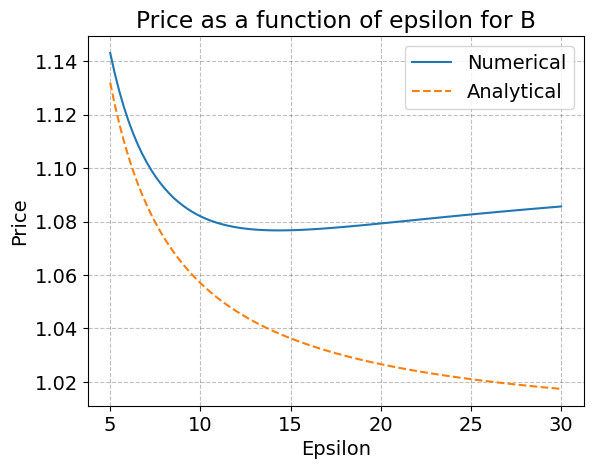

In [22]:
CM.plot_solve_B(xrange=[5,30])

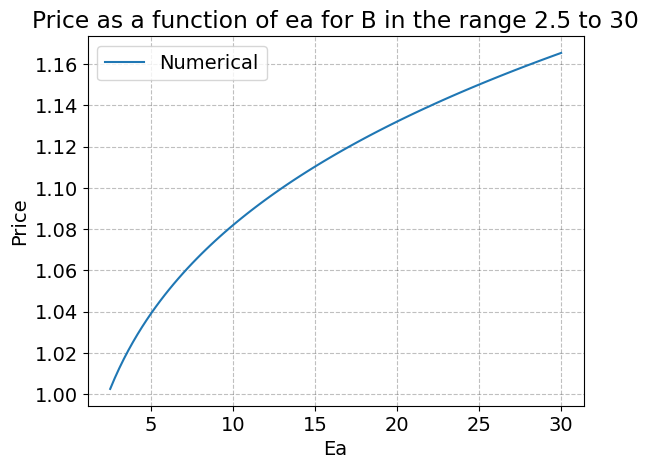

In [23]:
CM.plot_solve_B_range_ea()